In [13]:
from huggingface_hub import list_datasets

all_datasets = list(list_datasets())  # Convertir el generador a una lista
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(all_datasets[:10])  # Muestra los primeros 10 datasets

There are 278541 datasets currently available on the Hub
[DatasetInfo(id='fka/awesome-chatgpt-prompts', author='fka', sha='68ba7694e23014788dcc8ab5afe613824f45a05c', created_at=datetime.datetime(2022, 12, 13, 23, 47, 45, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2025, 1, 6, 0, 2, 53, tzinfo=datetime.timezone.utc), private=False, gated=False, disabled=False, downloads=5377, downloads_all_time=None, likes=6790, paperswithcode_id=None, tags=['task_categories:question-answering', 'license:cc0-1.0', 'size_categories:n<1K', 'format:csv', 'modality:text', 'library:datasets', 'library:pandas', 'library:mlcroissant', 'library:polars', 'region:us', 'ChatGPT'], trending_score=92, card_data=None, siblings=None), DatasetInfo(id='cfahlgren1/react-code-instructions', author='cfahlgren1', sha='d85f0682fd5dba9fa26ce46e18dce92becc2ff9d', created_at=datetime.datetime(2024, 8, 26, 3, 35, 11, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2025, 1, 10, 15, 23, 9, tzinfo=

In [14]:
from datasets import load_dataset
emotions = load_dataset("emotion")

Generating test split: 100%|██████████| 2000/2000 [00:00<00:00, 952385.10 examples/s]


In [15]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [17]:
train_ds = emotions["train"]
print(train_ds)
print(len(train_ds))

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})
16000


In [18]:
for i in range(5):
    print(train_ds[i])

{'text': 'i didnt feel humiliated', 'label': 0}
{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'label': 0}
{'text': 'im grabbing a minute to post i feel greedy wrong', 'label': 3}
{'text': 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'label': 2}
{'text': 'i am feeling grouchy', 'label': 3}


In [23]:
print(train_ds.features)
print(train_ds[:5])
print(type(train_ds))
print(type(train_ds[:5]))
print(train_ds["text"][:5])

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}
{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}
<class 'datasets.arrow_dataset.Dataset'>
<class 'dict'>
['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


In [26]:
# from datasets import load_dataset

# load the dataset from a file
# load_dataset("csv", data_files="my_file.csv")
# load_dataset("text", data_files="my_file.txt")
# load_dataset("json", data_files="my_file.jsonl")

# emotions_local = load_dataset("csv", data_files="train.txt", sep=";",
# names=["text", "label"])

In [27]:
import pandas as pd
emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [29]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


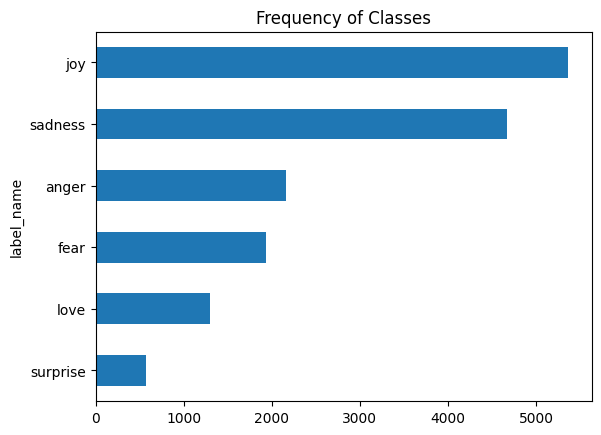

In [30]:
import matplotlib.pyplot as plt
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()